In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import os
print(os.listdir("../python"))


['.git', '.ipynb_checkpoints', 'dog-or-cat.ipynb', 'gui.ipynb', 'image', 'machineProject.ipynb', 'Model1.keras', 'test_data_set', 'training_data_set']


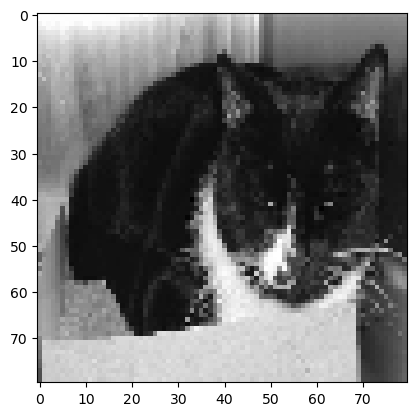

In [12]:
main_dir = "../python/"
train_dir = "training_data_set"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [17]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)



In [19]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
#Normalize data
X = X/255.0

In [ ]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


In [ ]:
test_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [ ]:
class_map = {
  0: 'cat',
  1: 'dog'
}
predictions = model.predict(X_test)
predicted_val = []
for p in predictions:
  predicted_val.append(class_map[int(round(p[0]))])

# predicted_val = [class_map[int(p[0])] for p in predictions]

submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
submission_df.to_csv("submission_val.csv", index=False)

In [ ]:
# # /kaggle/input/image11/cat.4002.jpg
# test_dir = "/kaggle/input/image11/"
# # path = os.path.join(main_dir,train_dir)
# os.listdir(test_dir)

# X_test = []
# id_line = []
# def create_test1_data(path):
#     for p in os.listdir(path):
#         id_line.append(p.split(".")[1])
#         img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
#         new_img_array = cv2.resize(img_array, dsize=(80, 80))
#         X_test.append(new_img_array)
# create_test1_data(test_dir)
# X_test = np.array(X_test).reshape(-1,80,80,1)
# X_test = X_test/255

In [ ]:
# predictions = model.predict(X_test)
# predicted_val = [int(round(p[0])) for p in predictions]
# submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
# submission_df.to_csv("submission_test.csv", index=False)

In [ ]:
test_dir = 'test_data_set'
list_dir = os.listdir(test_dir)

plt.figure(figsize = (15, 10))
idx = 0
for i in np.random.choice(len(list_dir), 9):
    idx += 1
    plt.subplot(3, 3, idx)
    path = test_dir + list_dir[i]
    image = plt.imread(path)
    plt.imshow(image)
    plt.title(f'Prediction: {str(predicted_val[i])}')

plt.tight_layout()
